1. What is K-Nearest Neighbors (KNN) and how does it work in both classification and regression problems?
        -> K-Nearest Neighbors (KNN) is a simple, non-parametric, supervised machine learning algorithm that can be used for both classification and regression tasks. It works by finding the 'k' nearest data points in the training set to a given new data point, based on a distance metric (commonly Euclidean distance).

        **In Classification**: For a new data point, KNN predicts the class that is most frequent among its 'k' nearest neighbors. The new data point is assigned to the class with the majority vote among the 'k' neighbors.
        **In Regression**: For a new data point, KNN predicts the value by taking the average (or weighted average) of the values of its 'k' nearest neighbors.

2. What is the Curse of Dimensionality and how does it affect KNN performance?
-> The Curse of Dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (spaces with many features or variables) that do not occur in low-dimensional settings. As the number of dimensions increases, the volume of the space grows exponentially, and the data points become increasingly sparse. This sparsity makes it difficult to find meaningful patterns or relationships in the data.

   **How it affects KNN performance**:
   - **Increased Sparsity**: In high-dimensional spaces, data points are far apart, and the concept of "nearest neighbors" becomes less meaningful. Distances between points tend to become more uniform, making it harder to distinguish between neighbors and non-neighbors.
   - **Increased Computational Cost**: Calculating distances between points in high dimensions is computationally expensive. As the number of dimensions increases, the time required to find the nearest neighbors grows significantly.
   - **Increased Risk of Overfitting**: With sparse data in high dimensions, KNN can become overly sensitive to noise and irrelevant features, leading to overfitting. The model might perform well on the training data but generalize poorly to new, unseen data.
   - **Need for More Data**: To maintain the same data density in a high-dimensional space as in a low-dimensional space, an exponentially larger amount of data is required. This is often not feasible in practice.

3. What is Principal Component Analysis (PCA)? How is it different from feature selection?
-> Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statistics. Its main goal is to reduce the number of features (dimensions) in a dataset while retaining as much of the original variance (information) as possible. PCA achieves this by transforming the data into a new set of variables called principal components. These principal components are orthogonal (uncorrelated) and are ordered such that the first principal component accounts for the largest possible variance, the second accounts for the next largest variance, and so on.

**How it works**:
1. **Standardization**: The data is standardized to have a mean of 0 and a standard deviation of 1. This is important because PCA is sensitive to the scale of the features.
2. **Covariance Matrix Calculation**: The covariance matrix of the standardized data is calculated. This matrix shows the relationships between the different features.
3. **Eigenvalue and Eigenvector Calculation**: The eigenvalues and eigenvectors of the covariance matrix are calculated. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues represent the magnitude of that variance.
4. **Sorting Eigenpairs**: The eigenvalues are sorted in descending order, and the corresponding eigenvectors are sorted accordingly. The eigenvectors with the largest eigenvalues are the principal components that capture the most variance.
5. **Selecting Principal Components**: A subset of the principal components is selected based on the desired level of dimensionality reduction and the amount of variance to retain.
6. **Transforming the Data**: The original data is projected onto the selected principal components, resulting in a new dataset with reduced dimensions.

**Difference from Feature Selection**:

While both PCA and feature selection are dimensionality reduction techniques, they differ in their approach:

- **PCA (Feature Extraction)**: PCA transforms the original features into a new set of uncorrelated features (principal components). These principal components are linear combinations of the original features. PCA creates entirely new features.
- **Feature Selection**: Feature selection methods select a subset of the original features based on certain criteria (e.g., correlation with the target variable, statistical tests, model performance). Feature selection keeps a subset of the original features and discards the rest.


4 What are eigenvalues and eigenvectors in PCA, and why are they important?
->
**Eigenvalues and Eigenvectors in PCA:**

- **Eigenvectors**: These are special vectors that, when a linear transformation (like the one represented by the covariance matrix) is applied to them, only change in magnitude (scaled by a factor) but not in direction. In the context of PCA, eigenvectors represent the directions of maximum variance in the data. They point along the principal components.
- **Eigenvalues**: These are the scalar factors by which the eigenvectors are scaled during the linear transformation. In PCA, eigenvalues represent the magnitude of the variance along the corresponding eigenvector. A larger eigenvalue indicates that there is more variance in the data along that particular eigenvector.

**Why they are important in PCA:**

Eigenvalues and eigenvectors are crucial in PCA for the following reasons:

1. **Identifying Principal Components**: The eigenvectors with the largest eigenvalues correspond to the principal components that capture the most variance in the data. These are the directions along which the data is most spread out.
2. **Determining the Amount of Variance Captured**: The magnitude of the eigenvalues tells us how much variance is captured by each principal component. By summing the eigenvalues of the selected principal components, we can determine the total amount of variance retained in the reduced-dimensional dataset.
3. **Dimensionality Reduction**: By selecting only the eigenvectors with the largest eigenvalues, we can reduce the dimensionality of the data while retaining most of the important information (variance). We discard the eigenvectors with small eigenvalues, as they represent directions with little variance.
4. **Ordering of Principal Components**: Eigenvalues allow us to order the principal components in terms of their importance (amount of variance captured). The first principal component (corresponding to the largest eigenvalue) is the most important, followed by the second, and so on.


5. How do KNN and PCA complement each other when applied in a single pipeline?
->
PCA and KNN complement each other in a pipeline by addressing some of the challenges KNN faces, particularly the curse of dimensionality. Here's how:

1. **Addressing the Curse of dimensionality**: As discussed earlier, KNN performance degrades in high-dimensional spaces due to data sparsity, increased computational cost, and the risk of overfitting. PCA, by reducing the number of dimensions while retaining most of the variance, can mitigate these issues. By applying PCA before KNN, you reduce the dimensionality of the data, making the distance calculations in KNN more meaningful and less computationally expensive.

2. **Noise Reduction**: PCA can help in reducing noise in the data. The principal components that capture the most variance are likely to represent the true underlying patterns in the data, while components with low variance might be associated with noise. By selecting only the top principal components, you effectively filter out some of the noise, which can lead to improved KNN performance.

3. **Improved Efficiency**: Reducing the number of features using PCA significantly reduces the computational cost of KNN. Calculating distances in a lower-dimensional space is much faster, making the training and prediction phases of KNN more efficient, especially for large datasets.

4. **Better Generalization**: By reducing dimensionality and potentially filtering noise, the combination of PCA and KNN can lead to a more robust model that generalizes better to unseen data. Reducing the risk of overfitting, which is a concern for KNN in high dimensions, improves the model's ability to perform well on new data points.

Accuracy without scaling: 0.7222222222222222
Accuracy with scaling: 0.9444444444444444


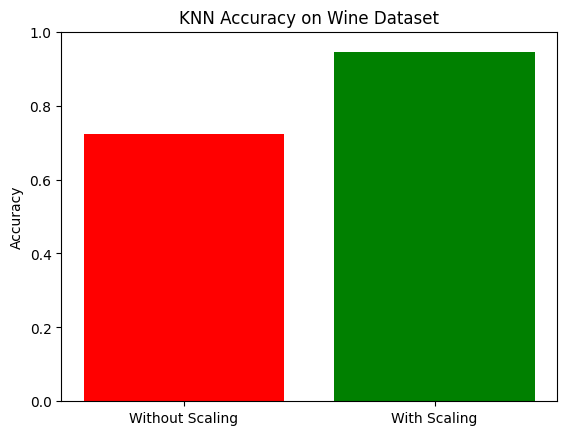

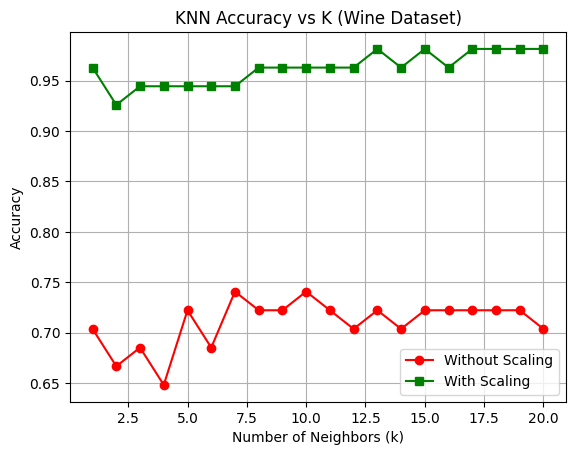

In [1]:
# Train a KNN Classifier on the Wine dataset with and without feature scaling. Compare model accuracy in both cases.

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_no_scaling = knn.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print Results
print("Accuracy without scaling:", accuracy_no_scaling)
print("Accuracy with scaling:", accuracy_scaled)

plt.bar(["Without Scaling", "With Scaling"],
        [accuracy_no_scaling, accuracy_scaled],
        color=['red', 'green'])
plt.title("KNN Accuracy on Wine Dataset")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

k_values = range(1, 21)
acc_no_scaling = []
acc_scaling = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_no_scaling.append(knn.score(X_test, y_test))

    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    acc_scaling.append(knn_scaled.score(X_test_scaled, y_test))

plt.plot(k_values, acc_no_scaling, marker='o', label="Without Scaling", color="red")
plt.plot(k_values, acc_scaling, marker='s', label="With Scaling", color="green")
plt.title("KNN Accuracy vs K (Wine Dataset)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Principal Component 1: 0.3620
Principal Component 2: 0.1921
Principal Component 3: 0.1112
Principal Component 4: 0.0707
Principal Component 5: 0.0656
Principal Component 6: 0.0494
Principal Component 7: 0.0424
Principal Component 8: 0.0268
Principal Component 9: 0.0222
Principal Component 10: 0.0193
Principal Component 11: 0.0174
Principal Component 12: 0.0130
Principal Component 13: 0.0080


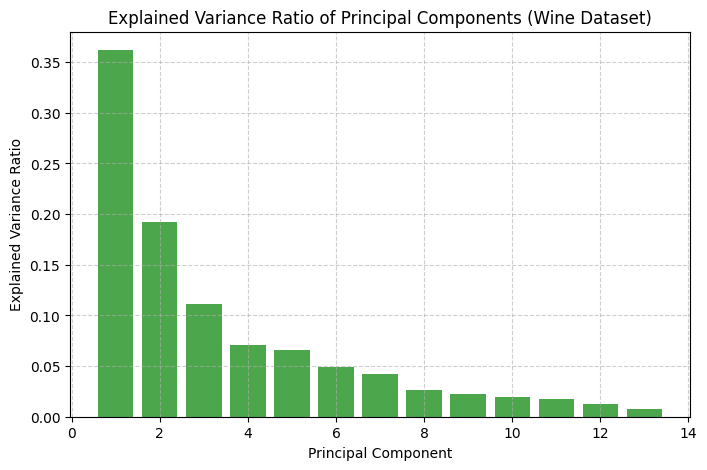

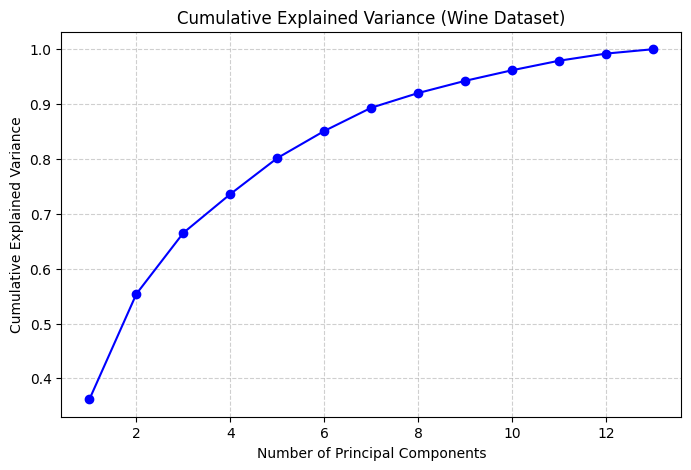

In [2]:
# Train a PCA model on the Wine dataset and print the explained variance ratio of each principal component.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine = load_wine()
X, y = wine.data, wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {var:.4f}")

plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color="green")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio of Principal Components (Wine Dataset)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color="blue")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance (Wine Dataset)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Accuracy on Original Dataset: 0.9444444444444444
Accuracy on PCA (2 components): 0.9629629629629629


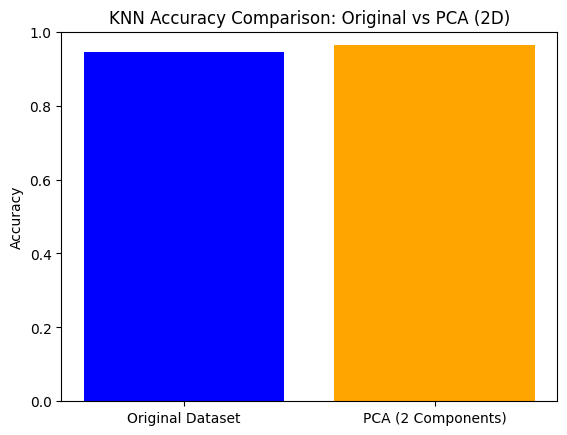

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

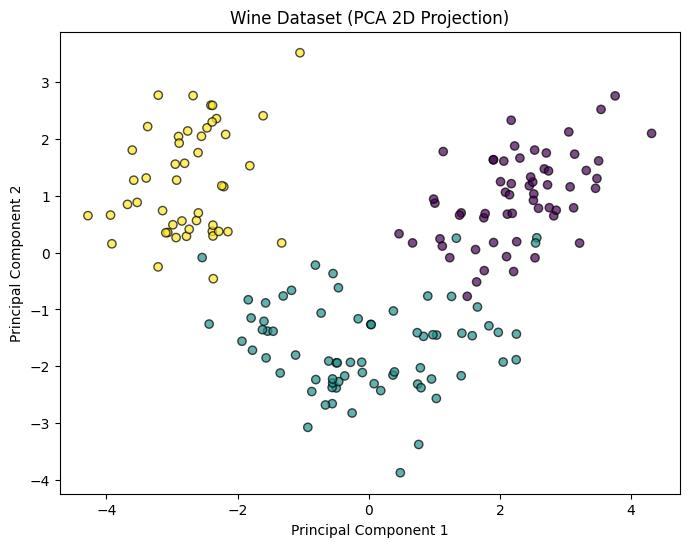

In [6]:
# Train a KNN Classifier on the PCA-transformed dataset (retain top 2 components). Compare the accuracy with the original dataset.

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

print("Accuracy on Original Dataset:", accuracy_original)
print("Accuracy on PCA (2 components):", accuracy_pca)

plt.bar(["Original Dataset", "PCA (2 Components)"],
        [accuracy_original, accuracy_pca],
        color=["blue", "orange"])
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Comparison: Original vs PCA (2D)")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", edgecolor="k", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Wine Dataset (PCA 2D Projection)")
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=wine.target_names)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Accuracy with euclidean distance: 0.9444
Accuracy with manhattan distance: 0.9815


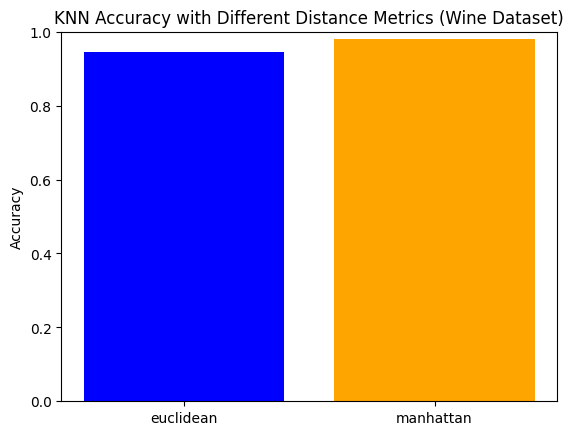

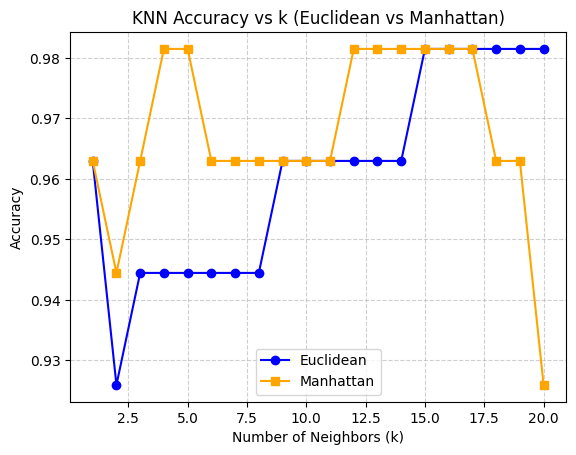

In [8]:
# Train a KNN Classifier with different distance metrics (euclidean, manhattan) on the scaled Wine dataset and compare the results.

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

metrics = ["euclidean", "manhattan"]
results = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[metric] = acc

for metric, acc in results.items():
    print(f"Accuracy with {metric} distance: {acc:.4f}")

plt.bar(results.keys(), results.values(), color=["blue", "orange"])
plt.ylabel("Accuracy")
plt.title("KNN Accuracy with Different Distance Metrics (Wine Dataset)")
plt.ylim(0, 1)
plt.show()

k_values = range(1, 21)
acc_euclidean = []
acc_manhattan = []

for k in k_values:
    knn_eu = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn_eu.fit(X_train, y_train)
    acc_euclidean.append(knn_eu.score(X_test, y_test))

    knn_ma = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    knn_ma.fit(X_train, y_train)
    acc_manhattan.append(knn_ma.score(X_test, y_test))

plt.plot(k_values, acc_euclidean, marker="o", label="Euclidean", color="blue")
plt.plot(k_values, acc_manhattan, marker="s", label="Manhattan", color="orange")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k (Euclidean vs Manhattan)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


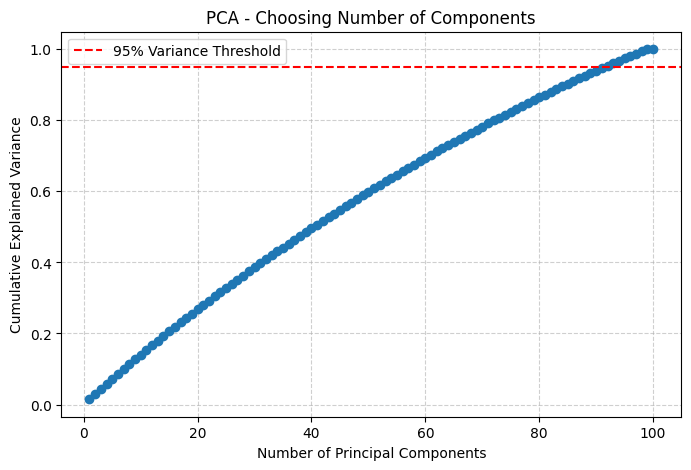

Selected number of components: 92
Model Accuracy after PCA + KNN: 0.3333333333333333


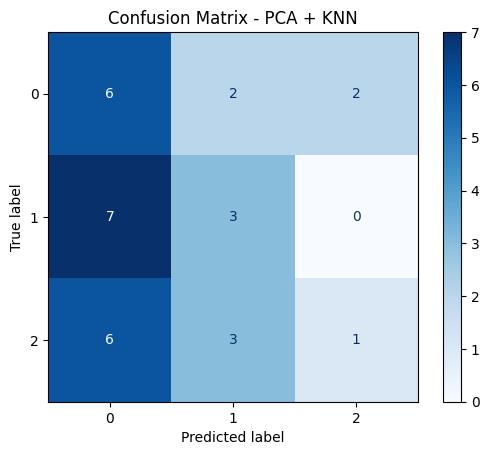

In [10]:
# You are working with a high-dimensional gene expression dataset to classify patients with different types of cancer.
# Due to the large number of features and a small number of samples, traditional models overfit.
# Explain how you would:
# ● Use PCA to reduce dimensionality
# ● Decide how many components to keep
# ● Use KNN for classification post-dimensionality reduction
# ● Evaluate the model
#● Justify this pipeline to your stakeholders as a robust solution for real-world biomedical data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

X, y = make_classification(n_samples=100, n_features=2000, n_informative=50,
                           n_classes=3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Choosing Number of Components")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Selected number of components: {n_components}")

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Model Accuracy after PCA + KNN:", acc)

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - PCA + KNN")
plt.show()
